Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/lfw/incomplete.AH3HKA_0.1.1/lfw-train.tfrecord*...:   0%|          | 0/132…

Dataset lfw downloaded and prepared to /root/tensorflow_datasets/lfw/0.1.1. Subsequent calls will reuse this data.


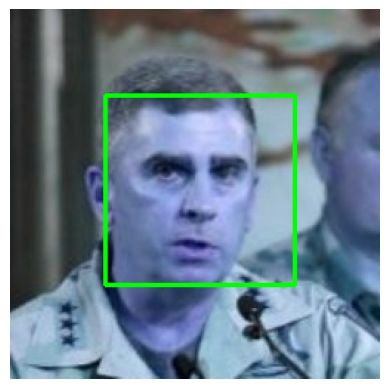

In [1]:
!pip install tensorflow_datasets opencv-python

import tensorflow_datasets as tfds
import cv2
import matplotlib.pyplot as plt
ds = tfds.load('lfw', split="train", shuffle_files=True)

face_cascade = cv2.CascadeClassifier()
face_cascade.load(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

  faces = face_cascade.detectMultiScale(gray, 1.3, 5, minSize = (30, 30))

  for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
  return image

for example in ds.take(1):
  image = example['image'].numpy()
  detected_image = detect_faces(image)

  plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))
  plt.axis("off")
  plt.show()

In [2]:
import requests
from PIL import Image
from io import BytesIO

image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYiTaDqfjqbHyDuXDdMg-mC1PGNZuVPxzQ6A&usqp=CAU'

response = requests.get(image_url)

if response.status_code == 200:
    image = Image.open(BytesIO(response.content))
    image.save('downloaded_image.jpg')
    print('Image downloaded successfully.')
else:
    print('Image could not be retrieved.')

Image downloaded successfully.


--2025-05-28 15:11:40--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2025-05-28 15:11:41 (80.2 MB/s) - ‘yolov3.cfg’ saved [8342/8342]

--2025-05-28 15:11:41--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco

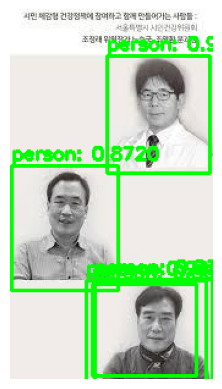

In [3]:
# 필요한 라이브러리 설치
!pip install tensorflow opencv-python

import cv2
import matplotlib.pyplot as plt
import numpy as np

!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
!wget https://data.pjreddie.com/files/yolov3.weights

net = cv2.dnn.readNetFromDarknet('yolov3.cfg', 'yolov3.weights')

# COCO 데이터셋의 클래스 레이블 로드
labels = open('coco.names').read().strip().split('\n')

# 얼굴을 포함하는 클래스 레이블의 인덱스 찾기 (person 클래스)
face_label_index = labels.index('person')

# 이미지 로드
image = cv2.imread('downloaded_image.jpg')  # 여기에 이미지 경로를 넣으세요.
(H, W) = image.shape[:2]

# YOLO 입력 설정
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)

# 객체 검출 수행
layer_outputs = net.forward(net.getUnconnectedOutLayersNames())

# 검출 결과 시각화
for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        if classID == face_label_index and confidence > 0.5:
            # 바운딩 박스 계산
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))

            cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
            text = "{}: {:.4f}".format(labels[classID], confidence)
            cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [4]:
# 필요한 라이브러리 설치
!pip install tf_slim
!pip install tensorflow-object-detection-api

# 모델을 다운로드하기 위한 도구들을 설치
!apt-get install -y -qq protobuf-compiler python-pil python-lxml python-tk

# object_detection을 위한 repository를 클론
!git clone --q https://github.com/tensorflow/models.git

# 필요한 패키지 설치
!cd models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

# 필요한 라이브러리 설치
!pip install -q tf_slim
!apt-get install -qq protobuf-compiler python-pil python-lxml python-tk
!git clone --quiet https://github.com/tensorflow/models.git
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.4/577.4 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.0/739.0 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.7 MB/s eta 0:00:00
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844488 sha256=0edd85f4307ebe41e41f6b23bc095d51

In [5]:
#https://image.dongascience.com/Photo/2020/06/7dc4e8fb10ed0cce7ff5e21521187389.jpg

import requests
from PIL import Image
from io import BytesIO

# 이미지의 URL을 정의
#image_url = 'https://image.dongascience.com/Photo/2020/06/7dc4e8fb10ed0cce7ff5e21521187389.jpg'  # 예시 URL이며, 실제 사용하려는 이미지의 URL로 변경해야 합니다.
#image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTfGy8L0kyEiHAWqfw_DSRN0XEKxC4IFkGSr_1PIXrbKlmoDyTUESdMIF4VBi0XjslYdJU&usqp=CAU'
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQYiTaDqfjqbHyDuXDdMg-mC1PGNZuVPxzQ6A&usqp=CAU'

# 이미지 데이터를 가져옴
response = requests.get(image_url)

# 요청이 성공했는지 확인
if response.status_code == 200:
    # 바이트 데이터로 이미지를 열고 저장
    image = Image.open(BytesIO(response.content))
    image.save('downloaded_image.jpg')
    print('Image downloaded successfully.')
else:
    print('Image could not be retrieved.')

Image downloaded successfully.


--2025-05-28 15:17:13--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5056 (4.9K) [text/plain]
Saving to: ‘object_detection/data/mscoco_label_map.pbtxt’

object_detection/da 100%[===================>]   4.94K  --.-KB/s    in 0s      

2025-05-28 15:17:13 (56.0 MB/s) - ‘object_detection/data/mscoco_label_map.pbtxt’ saved [5056/5056]

Output Dictionary:
{'detection_boxes': array([[0.7407781 , 0.45147163, 0.99747896, 0.9912537 ],
       [0.3349304 , 0.67781335, 0.4251394 , 0.74281687],
       [0.43590802, 0.        , 0.74481267, 0.61935705],
       [0.13405332, 0.43324247, 0.4910302 , 1.        ],
       [0.1238853 , 0.41935334, 0.7739024 , 0.9615

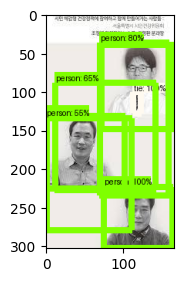

In [1]:
!pip install protobuf==3.20.3
!mkdir -p object_detection/data
!wget -O object_detection/data/mscoco_label_map.pbtxt https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/mscoco_label_map.pbtxt

import os
import tarfile
import numpy as np
import tensorflow as tf
import pathlib
from PIL import Image
import matplotlib.pyplot as plt
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

uploaded_model_path = 'faster_rcnn_inception_v2_coco_2018_01_28.tar.gz'  # 업로드한 파일명

extract_path = 'model'  # 압축 해제
if not os.path.exists(extract_path):
    with tarfile.open(uploaded_model_path) as tar:
        tar.extractall(path=extract_path)

# 객체 탐지 모델 다운로드
model_name = 'faster_rcnn_inception_v2_coco_2018_01_28'
model_file = model_name + '.tar.gz'
download_base = 'http://download.tensorflow.org/models/object_detection/'

model_dir = pathlib.Path(extract_path) / 'faster_rcnn_inception_v2_coco_2018_01_28' / 'saved_model'

# 모델 로드
detection_model = tf.saved_model.load(str(model_dir))

# 레이블 맵 로드
PATH_TO_LABELS = 'object_detection/data/mscoco_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

# 이미지 처리 함수
def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

# 추론을 위한 함수
def run_inference_for_single_image(model, image):
    image = np.asarray(image)
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis,...]

    model_fn = model.signatures['serving_default']
    output_dict = model_fn(input_tensor)

    num_detections = int(output_dict.pop('num_detections'))
    output_dict = {key: value[0, :num_detections].numpy()
                   for key, value in output_dict.items()}
    output_dict['num_detections'] = num_detections

    output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
    if 'detection_masks' in output_dict:
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                output_dict['detection_masks'], output_dict['detection_boxes'],
                image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                           tf.uint8)
        output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

    return output_dict

# 이미지 로드 및 실행
image_path = 'downloaded_image.jpg'  # 이미지 경로
image_np = load_image_into_numpy_array(image_path)
output_dict = run_inference_for_single_image(detection_model, image_np)

# output_dict 출력
print("Output Dictionary:")
print(output_dict)

# 결과 시각화
image = Image.open(image_path)
print(image)
image_width, image_height = image.size
# 화면 해상도를 고려한 figsize 계산 (여기서는 100 dpi로 가정)
figsize_width = image_width / 100.0
figsize_height = image_height / 100.0

plt.figure(figsize=(figsize_width, figsize_height))
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)

plt.imshow(image_np)